In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import nltk
import collections
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers, losses
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from scipy import spatial
import matplotlib.pyplot as plt

## Create Pairs

In [ ]:
def create_pairs(x, y):

  pairs_list = []
  labels_list = []

  for i in range(len(x)):
    for j in range(len(x)):
      if i == j:
        continue;
      if j < i:
        continue;
      pairs_list.append((x[i], x[j]))
      labels_list.append((y[i][0], y[j][0]))

  return np.array(pairs_list), np.array(labels_list)

In [ ]:
x_train_pairs, y_train_labels = create_pairs(X_train, y_train)
x_test_pairs, y_test_labels = create_pairs(X_test, y_test)

In [ ]:
x_train_pairs.shape

(4950, 2, 7334)

In [ ]:
y_test_labels.shape

(4950, 2)

In [ ]:
y_test_labels = np.where(y_test_labels[:,0] == y_test_labels[:,1], 0, 1)
y_test_labels.sum() / len(y_test_labels)

0.48868686868686867

## BERT

In [ ]:
!pip install spacy-sentence-bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.6 MB/s 
     |████████████████████████████████| 5.5 MB 10.8 MB/s 
     |████████████████████████████████| 1.3 MB 4.7 MB/s 
     |████████████████████████████████| 182 kB 13.9 MB/s 
     |████████████████████████████████| 7.6 MB 41.5 MB/s 
  Created wheel for spacy-sentence-bert: filename=spacy_sentence_bert-0.1.2-py3-none-any.whl size=27201 sha256=2a2dda78d01972630629d0638fc44a61948d52f0cba2e356bac0f57aeeb55050
  Stored in directory: /root/.cache/pip/wheels/54/e2/4a/e3f24fb6729ada3c83377de5217261c0e2f153c5a6f36d37d0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=fc2a90095f86982ee545a1257a70579beecd871ef81b4f6a92a305cedcd8edb2
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built spacy-sentence-bert sent

In [ ]:
import spacy_sentence_bert
import spacy

In [ ]:
nlp = spacy_sentence_bert.load_model('en_stsb_roberta_large')

Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/674 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
df.iloc[:,1]

0      1
1      1
2      1
3      0
4      1
      ..
195    0
196    0
197    0
198    1
199    0
Name: sentiment, Length: 200, dtype: object

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP_Projekt/IMDB Dataset.csv").iloc[:200,:]
y = np.asarray(df.iloc[:,1])
y[y=="positive"] = 1
y[y=="negative"] = 0
y = y.reshape(-1,1).astype('float32')
X = np.array([nlp(df.iloc[i,0]).vector for i in range(df.shape[0])])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape

(100, 1024)

In [ ]:
y_test.sum()

45.0

In [ ]:
y = np.asarray(df.iloc[:,1])
y[y=="positive"] = 1
y[y=="negative"] = 0
y = y.reshape(-1,1).astype('float32')

x_train_pairs, y_train_labels = create_pairs(X_train, y_train)
x_test_pairs, y_test_labels = create_pairs(X_test, y_test)

In [ ]:
# if labels are the same -> label 0
# if labels are not the same -> label 1
y_train_labels = np.where(y_train_labels[:,0] == y_train_labels[:,1], 0, 1)
y_train_labels

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
x_train_pairs[0,0,:]

array([-0.3918504 ,  0.04102486, -0.9326426 , ..., -0.17441124,
       -1.792643  ,  2.06801   ], dtype=float32)

In [ ]:
x_train_pairs[0,1,:]

array([-0.10736309,  0.94675165,  0.6190509 , ..., -0.44930738,
       -0.4416906 ,  1.4307344 ], dtype=float32)

In [ ]:
# https://keras.io/examples/vision/siamese_contrastive/
# Provided two tensors t1 and t2
# Euclidean distance = sqrt(sum(square(t1-t2)))

len_bag = x_train_pairs.shape[2]

def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    x = tf.math.l2_normalize(x)
    y = tf.math.l2_normalize(y)
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    output = tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))
    return output

def cosine_sim(vects):
    x, y = vects
    x = tf.math.l2_normalize(x)
    y = tf.math.l2_normalize(y)

    return tf.multiply(x,y)

def loss(margin=1):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

    Arguments:
        margin: Integer, defines the baseline for distance for which pairs
                should be classified as dissimilar. - (default is 1).

    Returns:
        'constrastive_loss' function with data ('margin') attached.
    """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):

        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """


        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        # return tf.math.reduce_mean(
        #     (1 - y_true) * square_pred + (y_true) * margin_square
        # )

        return tfa.losses.contrastive_loss(y_true, square_pred, margin=0.5)

    return contrastive_loss



input = layers.Input((len_bag,))
x = tf.keras.layers.BatchNormalization()(input)
x = layers.Dense(512)(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256)(x)
x = layers.Dense(128)(x)
x = layers.Dense(32)(x)

embedding_network = tf.keras.Model(input, x)


input_1 = layers.Input((len_bag,))
input_2 = layers.Input((len_bag,))

# As mentioned above, Siamese Network share weights between
# tower networks (sister networks). To allow this, we will use
# same embedding network for both tower networks.
tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)
siamese = tf.keras.Model(inputs=[input_1, input_2], outputs=output_layer)

In [ ]:
siamese.compile(loss=loss(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=["accuracy"], run_eagerly=True)
siamese.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1024)]       0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1024)]       0           []                               
                                                                                                  
 model_2 (Functional)           (None, 32)           697248      ['input_5[0][0]',                
                                                                  'input_6[0][0]']                
                                                                                                  
 lambda_1 (Lambda)              (None, 1)            0           ['model_2[0][0]',          

In [ ]:
x_train_1 = x_train_pairs[:,0,:]
x_train_2 = x_train_pairs[:,1,:]

x_test_1 = x_test_pairs[:,0,:]
x_test_2 = x_test_pairs[:,1,:]

x_train_1 = tf.convert_to_tensor(x_train_1)
x_train_2 = tf.convert_to_tensor(x_train_2)

x_test_1 = tf.convert_to_tensor(x_test_1)
x_test_2 = tf.convert_to_tensor(x_test_2)

y_train_labels = tf.convert_to_tensor(y_train_labels)
y_test_labels = tf.convert_to_tensor(y_test_labels)


y_train_labels = tf.cast(y_train_labels, tf.float32)
y_test_labels = tf.cast(y_test_labels, tf.float32)

x_test_1 = tf.cast(x_test_1, tf.float32)
x_test_2 = tf.cast(x_test_2, tf.float32)

x_train_1 = tf.cast(x_train_1, tf.float32)
x_train_2 = tf.cast(x_train_2, tf.float32)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

history = siamese.fit(
    [x_train_1, x_train_2],
    y_train_labels,
    validation_data=([x_test_1, x_test_2], y_test_labels),
    batch_size=128,
    epochs=10
)


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


39/39 [==============================] - 5s 126ms/step - loss: 0.0980 - accuracy: 0.5075 - val_loss: 0.0622 - val_accuracy: 0.4500
Epoch 2/10
39/39 [==============================] - 5s 131ms/step - loss: 0.0920 - accuracy: 0.4883 - val_loss: 0.0622 - val_accuracy: 0.4502
Epoch 3/10
39/39 [==============================] - 5s 128ms/step - loss: 0.0880 - accuracy: 0.4840 - val_loss: 0.0622 - val_accuracy: 0.4530
Epoch 4/10
39/39 [==============================] - 7s 169ms/step - loss: 0.0862 - accuracy: 0.4723 - val_loss: 0.0624 - val_accuracy: 0.4698
Epoch 5/10
39/39 [==============================] - 5s 129ms/step - loss: 0.0827 - accuracy: 0.4691 - val_loss: 0.0626 - val_accuracy: 0.4710
Epoch 6/10
39/39 [==============================] - 5s 124ms/step - loss: 0.0813 - accuracy: 0.4634 - val_loss: 0.0629 - val_accuracy: 0.4847
Epoch 7/10
39/39 [==============================] - 5s 133ms/step - loss: 0.0791 - accuracy: 0.4481 - val_loss: 0.0633 - val_accuracy: 0.4967
Epoch 8/10
39/39 

In [ ]:
a = siamese.predict([x_test_1, x_test_2])

155/155 [==============================] - 3s 20ms/step


In [ ]:
y_test_labels.numpy()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
results = pd.DataFrame(a)
results["true"] = y_test_labels[:,1]
results.iloc[:50,:]

,0,true
0,0.669403,0.0
1,0.820470,0.0
2,0.825707,0.0
3,0.728253,0.0
4,0.754589,0.0
5,0.732197,0.0
6,0.792361,1.0
7,0.772184,0.0
8,0.772211,0.0
9,0.769055,0.0


In [ ]:
import matplotlib.pyplot as plt

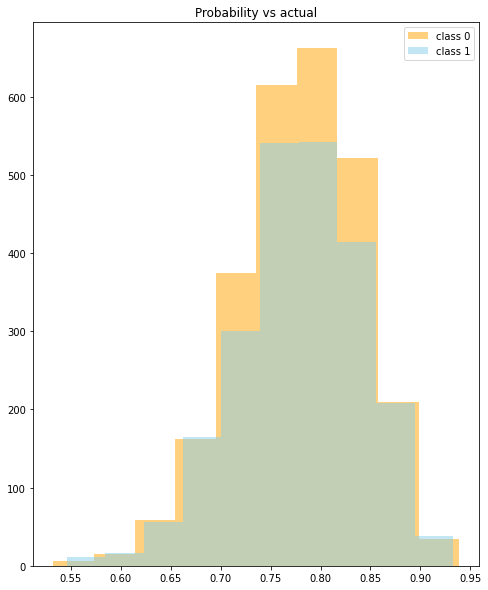

In [ ]:
plt.figure(figsize=(8,10))
plt.hist(results[results["true"] == 0][0], color="orange", alpha = 0.5)
plt.hist(results[results["true"] == 1][0], color="skyblue", alpha = 0.5)
plt.legend(["class 0", "class 1"])
plt.title("Probability vs actual")
plt.show()

In [ ]:
preds = []

for i in range(len(X_test)):
    pairs_list = []

    for j in range(len(X_train)):
        pairs_list.append((X_test[i], X_train[j]))

    pairs_list = np.array(pairs_list)

    b = siamese.predict([pairs_list[:,0,:], pairs_list[:,1,:]])
    preds.append(int(b[np.where(y_train.flatten() == 0)].mean() < b[np.where(y_train.flatten() == 1)].mean()))

4/4 [==============================] - 0s 15ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


4/4 [==============================] - 0s 18ms/step


In [ ]:
np.mean(y_test.flatten()==preds)

0.55

## BERT + CV 

In [ ]:
# https://keras.io/examples/vision/siamese_contrastive/
# Provided two tensors t1 and t2
# Euclidean distance = sqrt(sum(square(t1-t2)))
def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    x = tf.math.l2_normalize(x)
    y = tf.math.l2_normalize(y)
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    output = tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))
    return output

def cosine_sim(vects):
    x, y = vects
    x = tf.math.l2_normalize(x)
    y = tf.math.l2_normalize(y)

    return tf.multiply(x,y)

def loss(margin=0.5):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

    Arguments:
        margin: Integer, defines the baseline for distance for which pairs
                should be classified as dissimilar. - (default is 1).

    Returns:
        'constrastive_loss' function with data ('margin') attached.
    """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):

        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """


        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

        # return tfa.losses.contrastive_loss(y_true, square_pred, margin=0.5)

    return contrastive_loss


Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_68 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 input_69 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 model_44 (Functional)          (None, 32)           4902304     ['input_68[0][0]',               
                                                                  'input_69[0][0]']               
                                                                                                  
 lambda_22 (Lambda)             (None, 32)           0           ['model_44[0][0]',        

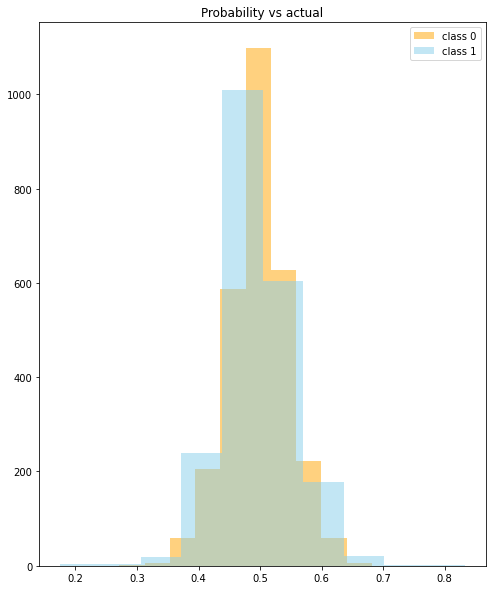

4/4 [==============================] - 0s 19ms/step
Accuracy:
0.73
Model: "model_47"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_71 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 input_72 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 model_46 (Functional)          (None, 32)           4902304     ['input_71[0][0]',               
                                                                  'input_72[0][0]']               
                                                                                                  
 lambda_23 (Lambda)     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


155/155 [==============================] - 18s 117ms/step - loss: 0.2501 - accuracy: 0.5020 - val_loss: 0.2500 - val_accuracy: 0.5182
Epoch 2/5
155/155 [==============================] - 18s 118ms/step - loss: 0.2457 - accuracy: 0.6212 - val_loss: 0.2498 - val_accuracy: 0.5442
Epoch 3/5
155/155 [==============================] - 19s 121ms/step - loss: 0.2344 - accuracy: 0.7707 - val_loss: 0.2494 - val_accuracy: 0.5541
Epoch 4/5
155/155 [==============================] - 16s 107ms/step - loss: 0.2230 - accuracy: 0.8523 - val_loss: 0.2494 - val_accuracy: 0.5499
Epoch 5/5
155/155 [==============================] - 3s 19ms/step


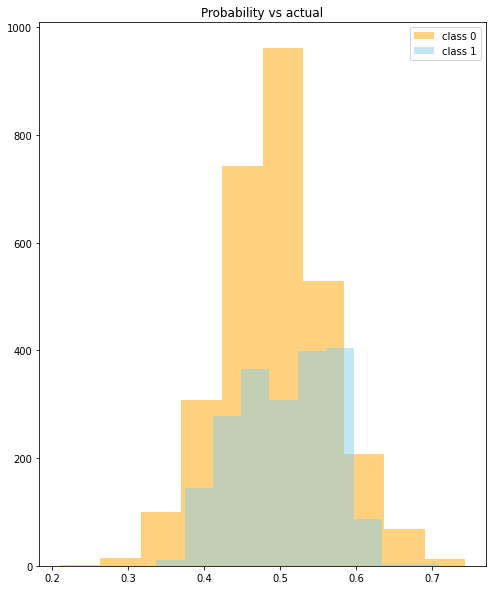

4/4 [==============================] - 0s 20ms/step
Accuracy:
0.8
Model: "model_49"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_74 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 input_75 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 model_48 (Functional)          (None, 32)           4902304     ['input_74[0][0]',               
                                                                  'input_75[0][0]']               
                                                                                                  
 lambda_24 (Lambda)      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


155/155 [==============================] - 17s 108ms/step - loss: 0.2494 - accuracy: 0.5265 - val_loss: 0.2499 - val_accuracy: 0.5411
Epoch 2/5
155/155 [==============================] - 18s 118ms/step - loss: 0.2429 - accuracy: 0.6687 - val_loss: 0.2491 - val_accuracy: 0.5690
Epoch 3/5
155/155 [==============================] - 18s 117ms/step - loss: 0.2300 - accuracy: 0.8117 - val_loss: 0.2478 - val_accuracy: 0.5702
Epoch 4/5
155/155 [==============================] - 17s 107ms/step - loss: 0.2197 - accuracy: 0.8590 - val_loss: 0.2461 - val_accuracy: 0.5769
Epoch 5/5
155/155 [==============================] - 3s 19ms/step


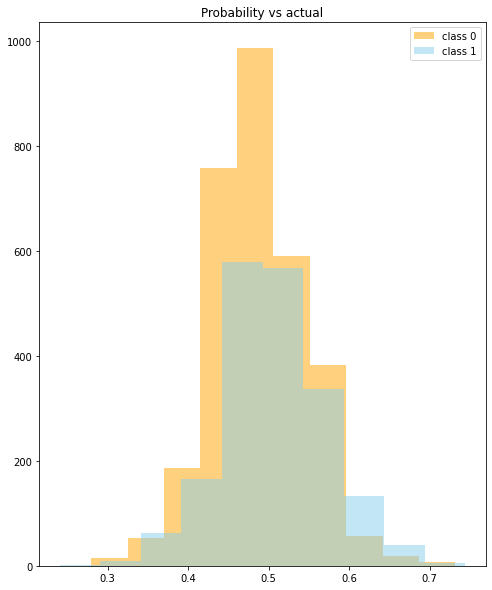

4/4 [==============================] - 0s 19ms/step
Accuracy:
0.76
Model: "model_51"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_77 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 input_78 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 model_50 (Functional)          (None, 32)           4902304     ['input_77[0][0]',               
                                                                  'input_78[0][0]']               
                                                                                                  
 lambda_25 (Lambda)     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


155/155 [==============================] - 18s 116ms/step - loss: 0.2495 - accuracy: 0.5176 - val_loss: 0.2499 - val_accuracy: 0.5004
Epoch 2/5
155/155 [==============================] - 18s 117ms/step - loss: 0.2443 - accuracy: 0.6531 - val_loss: 0.2505 - val_accuracy: 0.4875
Epoch 3/5
155/155 [==============================] - 17s 109ms/step - loss: 0.2303 - accuracy: 0.8192 - val_loss: 0.2518 - val_accuracy: 0.4743
Epoch 4/5
155/155 [==============================] - 18s 118ms/step - loss: 0.2184 - accuracy: 0.8980 - val_loss: 0.2546 - val_accuracy: 0.4689
Epoch 5/5
155/155 [==============================] - 3s 19ms/step


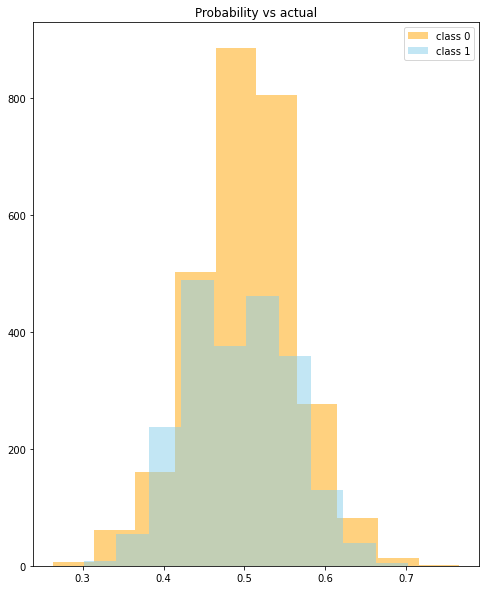

4/4 [==============================] - 0s 20ms/step
Accuracy:
0.72


In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.metrics import f1_score

df = pd.read_csv("/content/drive/MyDrive/NLP_Projekt/IMDB Dataset.csv").iloc[:200,:]
y = np.asarray(df.iloc[:,1])
y[y=="positive"] = 1
y[y=="negative"] = 0
y = y.reshape(-1,1).astype('float32')
X = np.array([nlp(df.iloc[i,0]).vector for i in range(df.shape[0])])

skf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=123)
skf.get_n_splits(X, y)

accuracy_list = []
f1_score_list = []

for train_index, test_index in skf.split(X, y):

  # Select random subsamples
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  X_train = np.array(X_train)
  X_test = np.array(X_test)
  X_train.shape

  # create pairs
  x_train_pairs, y_train_labels = create_pairs(X_train, y_train)
  x_test_pairs, y_test_labels = create_pairs(X_test, y_test)
  # if labels are the same -> label 0
  # if labels are not the same -> label 1
  y_train_labels = np.where(y_train_labels[:,0] == y_train_labels[:,1], 0, 1)

  # https://keras.io/examples/vision/siamese_contrastive/
  # Provided two tensors t1 and t2
  # Euclidean distance = sqrt(sum(square(t1-t2)))

  len_bag = x_train_pairs.shape[2]

  input = layers.Input((len_bag,))
  x = tf.keras.layers.BatchNormalization()(input)
  x = layers.Dense(2048)(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(1024)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(512)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(256)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(128)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(32)(x)

  embedding_network = tf.keras.Model(input, x)


  input_1 = layers.Input((len_bag,))
  input_2 = layers.Input((len_bag,))

  # As mentioned above, Siamese Network share weights between
  # tower networks (sister networks). To allow this, we will use
  # same embedding network for both tower networks.
  tower_1 = embedding_network(input_1)
  tower_2 = embedding_network(input_2)

  merge_layer = layers.Lambda(cosine_sim)([tower_1, tower_2])
  normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
  output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)
  siamese = tf.keras.Model(inputs=[input_1, input_2], outputs=output_layer)

  siamese.compile(loss=loss(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=["accuracy"], run_eagerly=True)
  siamese.summary()

  x_train_1 = x_train_pairs[:,0,:]
  x_train_2 = x_train_pairs[:,1,:]

  x_test_1 = x_test_pairs[:,0,:]
  x_test_2 = x_test_pairs[:,1,:]

  x_train_1 = tf.convert_to_tensor(x_train_1)
  x_train_2 = tf.convert_to_tensor(x_train_2)

  x_test_1 = tf.convert_to_tensor(x_test_1)
  x_test_2 = tf.convert_to_tensor(x_test_2)

  y_train_labels = tf.convert_to_tensor(y_train_labels)
  y_test_labels = tf.convert_to_tensor(y_test_labels)


  y_train_labels = tf.cast(y_train_labels, tf.float32)
  y_test_labels = tf.cast(y_test_labels, tf.float32)

  x_test_1 = tf.cast(x_test_1, tf.float32)
  x_test_2 = tf.cast(x_test_2, tf.float32)

  x_train_1 = tf.cast(x_train_1, tf.float32)
  x_train_2 = tf.cast(x_train_2, tf.float32)


  history = siamese.fit(
      [x_train_1, x_train_2],
      y_train_labels,
      validation_data=([x_test_1, x_test_2], y_test_labels),
      batch_size=32,
      epochs=5
  )

  a = siamese.predict([x_test_1, x_test_2])
  results = pd.DataFrame(a)
  results["true"] = y_test_labels[:,1]
  results.iloc[:50,:]

  plt.figure(figsize=(8,10))
  plt.hist(results[results["true"] == 0][0], color="orange", alpha = 0.5)
  plt.hist(results[results["true"] == 1][0], color="skyblue", alpha = 0.5)
  plt.legend(["class 0", "class 1"])
  plt.title("Probability vs actual")
  plt.show()

  preds = []

  for i in range(len(X_test)):
      pairs_list = []

      for j in range(len(X_train)):
          pairs_list.append((X_test[i], X_train[j]))

      pairs_list = np.array(pairs_list)

      b = siamese.predict([pairs_list[:,0,:], pairs_list[:,1,:]])
      preds.append(int(b[np.where(y_train.flatten() == 0)].mean() > b[np.where(y_train.flatten() == 1)].mean()))

  accuracy_list.append(np.mean(y_test.flatten()==preds))
  print("Accuracy:")
  print(np.mean(y_test.flatten()==preds))
  f1_score_list.append(f1_score(y_test.flatten(), preds))


In [ ]:
accuracy_list

[0.73, 0.8, 0.76, 0.72]

In [ ]:
f1_score_list

[0.7032967032967032,
 0.7560975609756099,
 0.6756756756756757,
 0.7200000000000001]

## Very basic network architecture + contrastive

In [ ]:
# https://keras.io/examples/vision/siamese_contrastive/
# Provided two tensors t1 and t2
# Euclidean distance = sqrt(sum(square(t1-t2)))
def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    x = tf.math.l2_normalize(x)
    y = tf.math.l2_normalize(y)
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    output = tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))
    return output

def cosine_sim(vects):
    x, y = vects
    x = tf.math.l2_normalize(x)
    y = tf.math.l2_normalize(y)

    return tf.multiply(x,y)

def loss(margin=0.5):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

    Arguments:
        margin: Integer, defines the baseline for distance for which pairs
                should be classified as dissimilar. - (default is 1).

    Returns:
        'constrastive_loss' function with data ('margin') attached.
    """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):

        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """


        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

        # return tfa.losses.contrastive_loss(y_true, square_pred, margin=0.5)

    return contrastive_loss


In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.metrics import f1_score

df = pd.read_csv("/content/drive/MyDrive/NLP_Projekt/IMDB Dataset.csv").iloc[:200,:]
y = np.asarray(df.iloc[:,1])
y[y=="positive"] = 1
y[y=="negative"] = 0
y = y.reshape(-1,1).astype('float32')
X = np.array([nlp(df.iloc[i,0]).vector for i in range(df.shape[0])])

skf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=123)
skf.get_n_splits(X, y)

accuracy_list = []
f1_score_list = []


Model: "model_55"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_83 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 input_84 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 model_54 (Functional)          (None, 32)           4902304     ['input_83[0][0]',               
                                                                  'input_84[0][0]']               
                                                                                                  
 lambda_27 (Lambda)             (None, 32)           0           ['model_54[0][0]',        

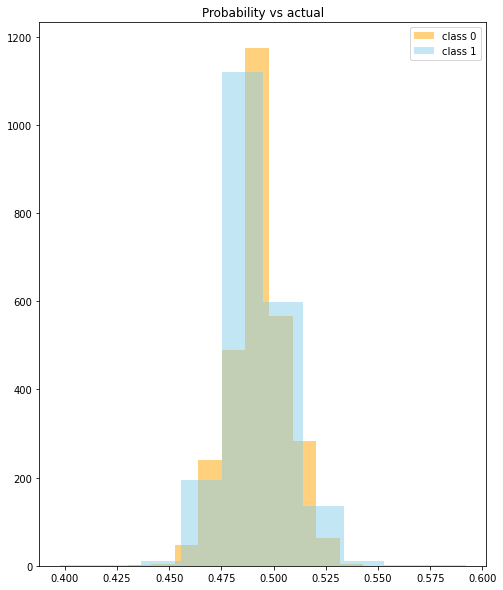

4/4 [==============================] - 0s 48ms/step
Accuracy:
0.77
Model: "model_57"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_86 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 input_87 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 model_56 (Functional)          (None, 32)           4902304     ['input_86[0][0]',               
                                                                  'input_87[0][0]']               
                                                                                                  
 lambda_28 (Lambda)     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


78/78 [==============================] - 24s 310ms/step - loss: 0.1246 - accuracy: 0.5002
Epoch 2/5
78/78 [==============================] - 24s 313ms/step - loss: 0.1238 - accuracy: 0.5020
Epoch 3/5
78/78 [==============================] - 24s 305ms/step - loss: 0.1228 - accuracy: 0.5251
Epoch 4/5
78/78 [==============================] - 24s 311ms/step - loss: 0.1215 - accuracy: 0.5572
Epoch 5/5
155/155 [==============================] - 8s 53ms/step


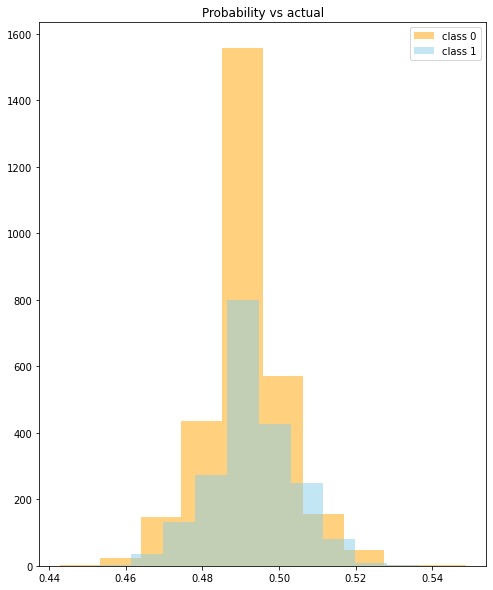

4/4 [==============================] - 0s 46ms/step
Accuracy:
0.77
Model: "model_59"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_89 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 input_90 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 model_58 (Functional)          (None, 32)           4902304     ['input_89[0][0]',               
                                                                  'input_90[0][0]']               
                                                                                                  
 lambda_29 (Lambda)     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


78/78 [==============================] - 24s 312ms/step - loss: 0.1251 - accuracy: 0.5182
Epoch 2/5
78/78 [==============================] - 24s 311ms/step - loss: 0.1230 - accuracy: 0.6475
Epoch 3/5
78/78 [==============================] - 24s 314ms/step - loss: 0.1196 - accuracy: 0.7657
Epoch 4/5
78/78 [==============================] - 25s 321ms/step - loss: 0.1165 - accuracy: 0.8162
Epoch 5/5
155/155 [==============================] - 9s 56ms/step


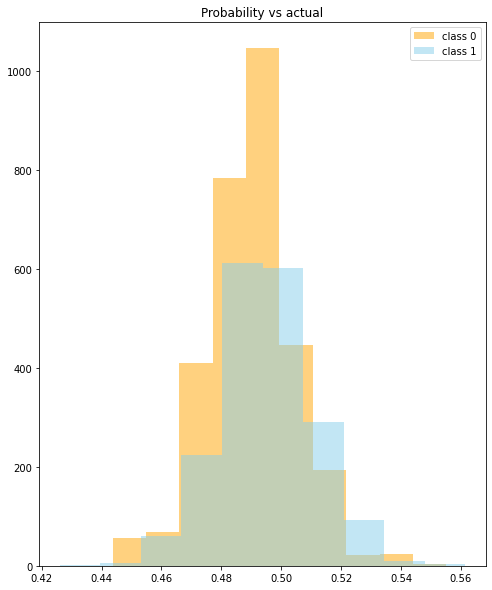

4/4 [==============================] - 0s 45ms/step
Accuracy:
0.72
Model: "model_61"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_92 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 input_93 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 model_60 (Functional)          (None, 32)           4902304     ['input_92[0][0]',               
                                                                  'input_93[0][0]']               
                                                                                                  
 lambda_30 (Lambda)     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


78/78 [==============================] - 25s 322ms/step - loss: 0.1274 - accuracy: 0.5087
Epoch 2/5
78/78 [==============================] - 26s 332ms/step - loss: 0.1255 - accuracy: 0.6212
Epoch 3/5
78/78 [==============================] - 26s 327ms/step - loss: 0.1222 - accuracy: 0.7519
Epoch 4/5
78/78 [==============================] - 25s 326ms/step - loss: 0.1186 - accuracy: 0.8341
Epoch 5/5
155/155 [==============================] - 9s 57ms/step


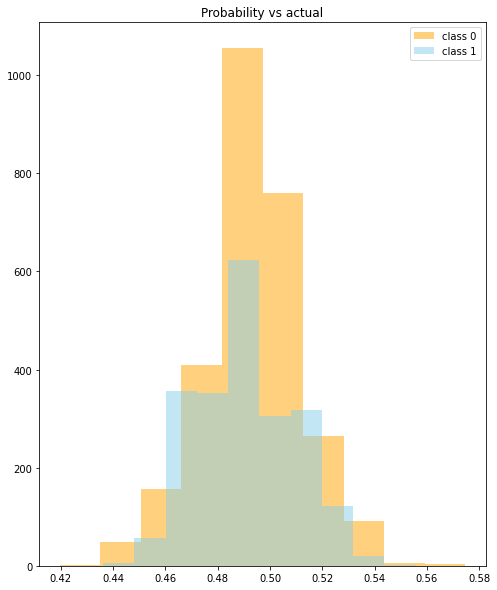

4/4 [==============================] - 0s 56ms/step
Accuracy:
0.74


In [ ]:
accuracy_list = []
f1_score_list = []

for train_index, test_index in skf.split(X, y):

  # Select random subsamples
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  X_train = np.array(X_train)
  X_test = np.array(X_test)
  X_train.shape

  # create pairs
  x_train_pairs, y_train_labels = create_pairs(X_train, y_train)
  x_test_pairs, y_test_labels = create_pairs(X_test, y_test)
  # if labels are the same -> label 0
  # if labels are not the same -> label 1
  y_train_labels = np.where(y_train_labels[:,0] == y_train_labels[:,1], 0, 1)

  # https://keras.io/examples/vision/siamese_contrastive/
  # Provided two tensors t1 and t2
  # Euclidean distance = sqrt(sum(square(t1-t2)))

  len_bag = x_train_pairs.shape[2]

  input = layers.Input((len_bag,))
  x = tf.keras.layers.BatchNormalization()(input)
  x = layers.Dense(2048)(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(1024)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(512)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(256)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(128)(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(32)(x)

  embedding_network = tf.keras.Model(input, x)


  input_1 = layers.Input((len_bag,))
  input_2 = layers.Input((len_bag,))

  # As mentioned above, Siamese Network share weights between
  # tower networks (sister networks). To allow this, we will use
  # same embedding network for both tower networks.
  tower_1 = embedding_network(input_1)
  tower_2 = embedding_network(input_2)

  merge_layer = layers.Lambda(cosine_sim)([tower_1, tower_2])
  normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
  output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)
  siamese = tf.keras.Model(inputs=[input_1, input_2], outputs=output_layer)

  siamese.compile(loss=loss(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=["accuracy"], run_eagerly=True)
  siamese.summary()

  x_train_1 = x_train_pairs[:,0,:]
  x_train_2 = x_train_pairs[:,1,:]

  x_test_1 = x_test_pairs[:,0,:]
  x_test_2 = x_test_pairs[:,1,:]

  x_train_1 = tf.convert_to_tensor(x_train_1)
  x_train_2 = tf.convert_to_tensor(x_train_2)

  x_test_1 = tf.convert_to_tensor(x_test_1)
  x_test_2 = tf.convert_to_tensor(x_test_2)

  y_train_labels = tf.convert_to_tensor(y_train_labels)
  y_test_labels = tf.convert_to_tensor(y_test_labels)


  y_train_labels = tf.cast(y_train_labels, tf.float32)
  y_test_labels = tf.cast(y_test_labels, tf.float32)

  x_test_1 = tf.cast(x_test_1, tf.float32)
  x_test_2 = tf.cast(x_test_2, tf.float32)

  x_train_1 = tf.cast(x_train_1, tf.float32)
  x_train_2 = tf.cast(x_train_2, tf.float32)


  history = siamese.fit(
      [x_train_1, x_train_2],
      y_train_labels,
      batch_size=64,
      epochs=5
  )

  a = siamese.predict([x_test_1, x_test_2])
  results = pd.DataFrame(a)
  results["true"] = y_test_labels[:,1]
  results.iloc[:50,:]

  plt.figure(figsize=(8,10))
  plt.hist(results[results["true"] == 0][0], color="orange", alpha = 0.5)
  plt.hist(results[results["true"] == 1][0], color="skyblue", alpha = 0.5)
  plt.legend(["class 0", "class 1"])
  plt.title("Probability vs actual")
  plt.show()

  preds = []

  for i in range(len(X_test)):
      pairs_list = []

      for j in range(len(X_train)):
          pairs_list.append((X_test[i], X_train[j]))

      pairs_list = np.array(pairs_list)

      b = siamese.predict([pairs_list[:,0,:], pairs_list[:,1,:]])
      preds.append(int(b[np.where(y_train.flatten() == 0)].mean() > b[np.where(y_train.flatten() == 1)].mean()))

  accuracy_list.append(np.mean(y_test.flatten()==preds))
  print("Accuracy:")
  print(np.mean(y_test.flatten()==preds))
  f1_score_list.append(f1_score(y_test.flatten(), preds))


In [ ]:
accuracy_list

[0.77, 0.77, 0.72, 0.74]

In [ ]:
f1_score_list

[0.7676767676767676, 0.7356321839080461, 0.6315789473684211, 0.74]